# Hausaufgabe 4
## Schallerzeugung durch einen umströmten Zylinder (Teil 1)
<!-- Lizensiert unter (CC BY 4.0) Gert Herold -->

Bei der Umströmung eines zylindrischen Körpers bilden sich hinter diesem häufig [Wirbelstraßen](https://de.wikipedia.org/wiki/K%C3%A1rm%C3%A1nsche_Wirbelstra%C3%9Fe) aus.
Je nach Medium, Strömungsgeschwindigkeit und Durchmesser des Zylinders können die gegenläufigen Wirbel wahrnehmbare Töne verursachen.

Hier soll basierend auf experimentellen Daten untersucht werden, wie die erzeugten Töne von der Strömungsgeschwindigkeit abhängen.
In einem Windkanal wurden zu diesem Zweck die Schallabstrahlung eines Zylinder mit 6 mm Durchmesser bei ~~15~~ 13 verschiedenen Geschwindigkeiten zwischen ca. $8$ und $50\,\frac{\text{m}}{\text{s}}$ gemessen und das Ergebnis in WAV-Dateien abgespeichert.

### 1) Einlesen der Daten

Die WAV-Dateien sollten für diese Aufgabe entpackt und in einem Unterordner "data" abgelegt werden.

**1.1) Erstellen Sie automatisiert eine Liste `wavlist` der Dateinamen der WAV-Dateien im Unterordner "data". Extrahieren Sie die jeweils zugehörige Strömungsgeschwindigkeit in $\frac{\text{m}}{\text{s}}$ automatisiert aus den Dateinamen, schreiben Sie sie in eine Liste `vlist` mit Fließkommawerten. Geben Sie beide Listen aus.**

Hinweis: Als Dezimaltrennzeichen wurde für die Geschwindigkeit im Dateinamen ein "o" verwendet, um Probleme mit der Identifikation der Dateiendung zu vermeiden.

In [1]:
# Hier eigenen Code schreiben ...
import os
import zipfile
import shutil


wavlist=list() 
vlist=list()


og = os.getcwd()
st = og+ "\data"
os.mkdir('data')
shutil.unpack_archive('data_HA4.zip', st)
os.chdir(st)

wavlist = os.listdir(st)
vlist = os.listdir(st)

vlist = [w.replace('_mps.wav', '') for w in vlist]
vlist = [w.replace('06_mm_', '') for w in vlist]
vlist = [w.replace('o', '.') for w in vlist]
vlist = [float(w) for w in vlist]

print(wavlist)
print(vlist)

['06_mm_08o32_mps.wav', '06_mm_10o73_mps.wav', '06_mm_14o10_mps.wav', '06_mm_18o69_mps.wav', '06_mm_22o10_mps.wav', '06_mm_25o06_mps.wav', '06_mm_29o76_mps.wav', '06_mm_34o00_mps.wav', '06_mm_37o25_mps.wav', '06_mm_40o95_mps.wav', '06_mm_44o07_mps.wav', '06_mm_45o42_mps.wav', '06_mm_47o31_mps.wav']
[8.32, 10.73, 14.1, 18.69, 22.1, 25.06, 29.76, 34.0, 37.25, 40.95, 44.07, 45.42, 47.31]


In [2]:
# Hier sind einige Plausibilitätstests:
assert len(wavlist) == len(vlist) == 13
assert all('data' in _ for _ in wavlist)
assert type(vlist[0]) == float

AssertionError: 

**1.2) Laden Sie die Schalldruck-Zeitdaten aus den WAV-Dateien. Plotten Sie die Daten für alle Geschwindigkeiten mit korrekten [x-Achsenbeschriftung](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlabel.html) und [Kenn](https://stackoverflow.com/questions/25239933/how-to-add-title-to-subplots-in-matplotlib)[zeichnung](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.text.html) der Geschwindigkeit in getrennt untereinanderliegenden Diagrammen.**

*Hinweise:*
  * *WAV-Dateien enthalten [digitalisierte Zeitdaten](https://de.wikipedia.org/wiki/Puls-Code-Modulation), z.B. können damit mit Mikrofonen aufgezeichnete zeitliche Schwankungen des Luftdrucks (Schall) abgespeichert werden.*
  * *Die WAV-Daten sind als Integer-Werte gespeichert. Um daraus z.B. Schalldrücke zu berechnen, müsste bekannt sein, welchem Schalldruckwert der maximale Integerwert entspricht. In dieser Aufgabe sind jedoch diesbezüglich nur Relativ-Werte von Interesse, sodass auf eine entsprechende Umrechnung verzichtet werden kann.*
  * *Die zeitliche Zuordnung der Werte hingegen muss exakt geschehen, wofür die [Abtastrate](https://de.wikipedia.org/wiki/Abtastrate), die in WAV-Dateien mit abgespeichert ist, bekannt sein muss.*

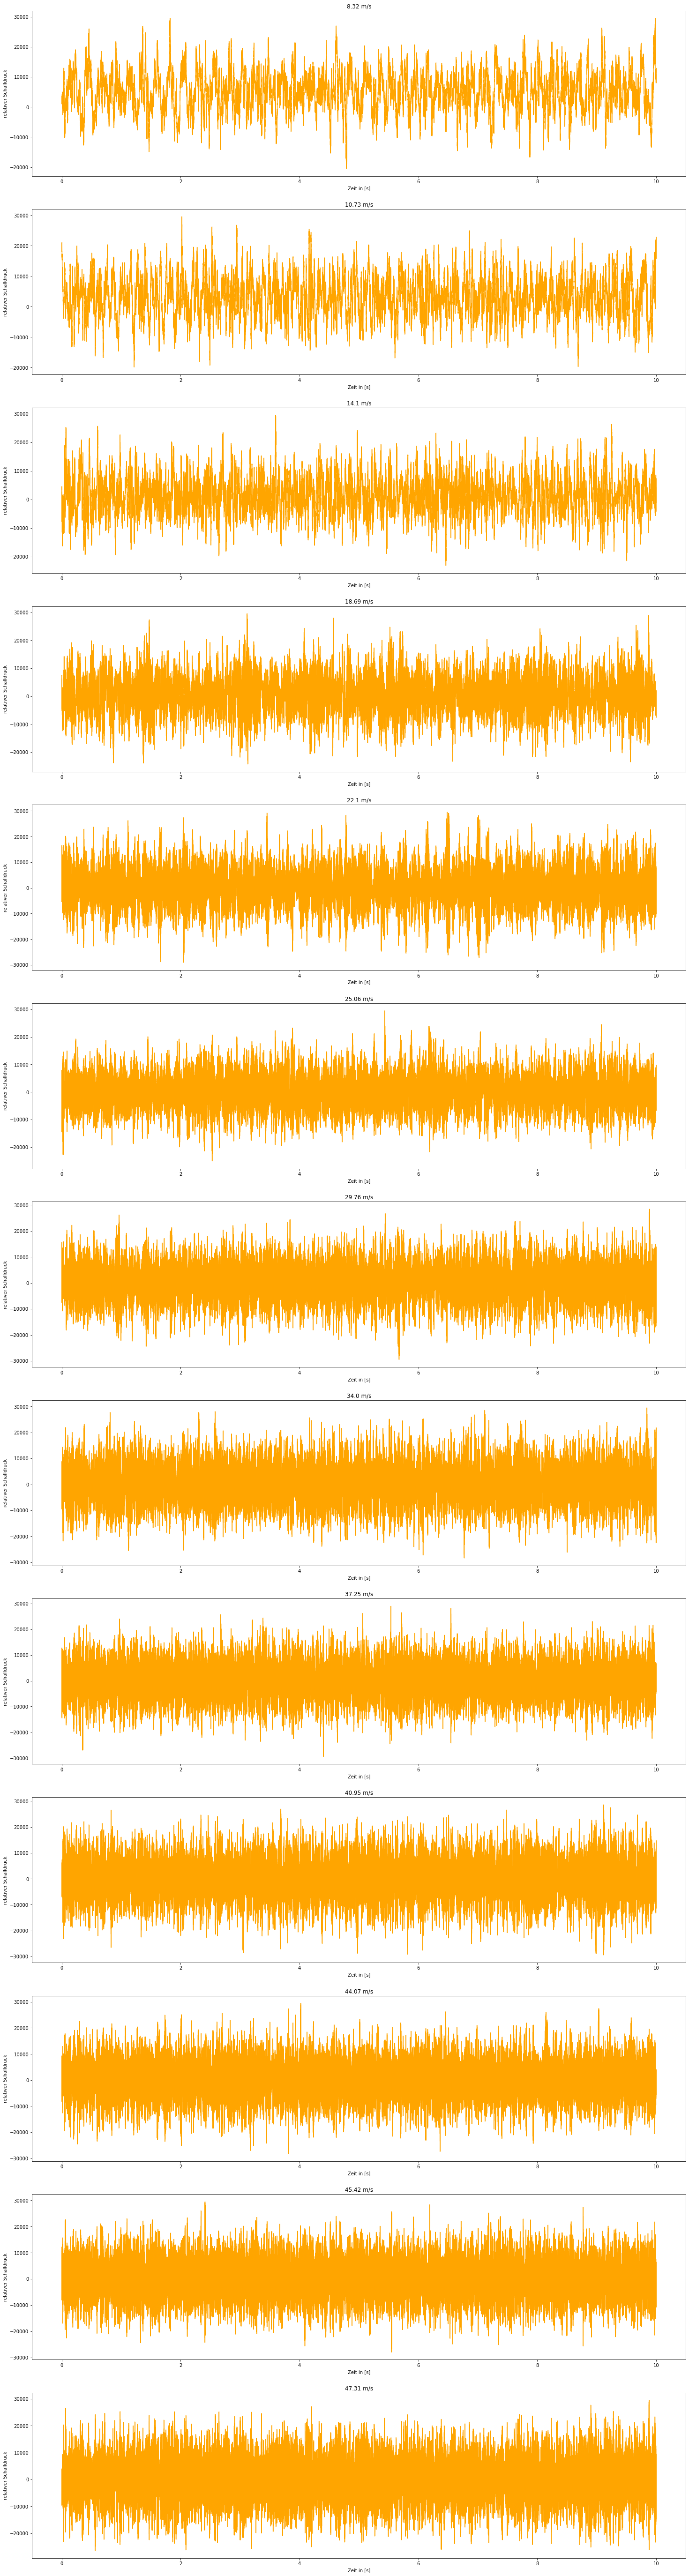

In [3]:
# Hier eigenen Code schreiben ...
os.chdir(st)
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


v = 1
for i in range(0,13):
    plt.figure(1,(10,4))
    plt.subplot(13,1,v)
    
    rd, rs = read(wavlist[i])
    xaxis = np.linspace(0,len(rs)/rd, len(rs))
    pd.Series(rs,xaxis).plot(figsize=(25,100), title = str(vlist[i]) + ' m/s' , color = 'orange')
    plt.xlabel('Zeit in [s]')
    plt.ylabel('relativer Schalldruck')
    v = v +1 



Um aus den Zeitdaten $p(t)$ Informationen über die darin enthaltenen Töne zu ermitteln, ist es sinnvoll, aus den Datensätzen jeweils ein Spektrum $p(f)$ zu berechnen. 
Dies geschieht allgemein über eine [Fourier-Transformation](https://de.wikipedia.org/wiki/Fourier-Transformation) bzw. für diskret abgetastete Werte mittels einer [Diskreten Fourier-Transformation](https://de.wikipedia.org/wiki/Diskrete_Fourier-Transformation) (DFT). Für reellwertige Signale ist diese z.B. im Modul [*numpy.fft*](https://docs.scipy.org/doc/numpy/reference/routines.fft.html) mit der Funktion [*rfft()*](https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.rfft.html) implementiert.

### 2) Hiebton

**2.1) Berechnen Sie die Spektren (Amplitudenquadrat über Frequenz) aller Zeitsignale und stellen Sie sie in einem gemeinsamen Diagramm dar:**

  * Berechnen Sie das Betragsquadrat $|p(f)|^2$ für die einzelnen Werte.
  * Stellen Sie diese nur für Frequenzen [bis](https://docs.scipy.org/doc/numpy/reference/generated/numpy.searchsorted.html) 2500 Hz dar. Beschriften Sie die x-Achse korrekt.
  * Um den ggf. verdeckten Verlauf einiger Spektren sichtbar zu machen, setzen Sie den Parameter *alpha* der Plotfunktion auf einen Wert kleiner als 1.
  * Wählen Sie eine ausreichende Größe der Abbildung.
  * Stellen Sie die y-Achse mit logarithmischer Skalierung dar.
  * Fügen Sie der Abbildung eine Legende hinzu, damit die jeweiligen Spektren zuordenbar sind.
  
_Hinweis: Die zugehörigen Frequenzen lassen sich mithilfe der Funktion [rfftfreq()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.rfftfreq.html) berechnen. 
Anzahl der Samples sowie Abtastrate sind bereits aus Aufgabenteil 1 bekannt._

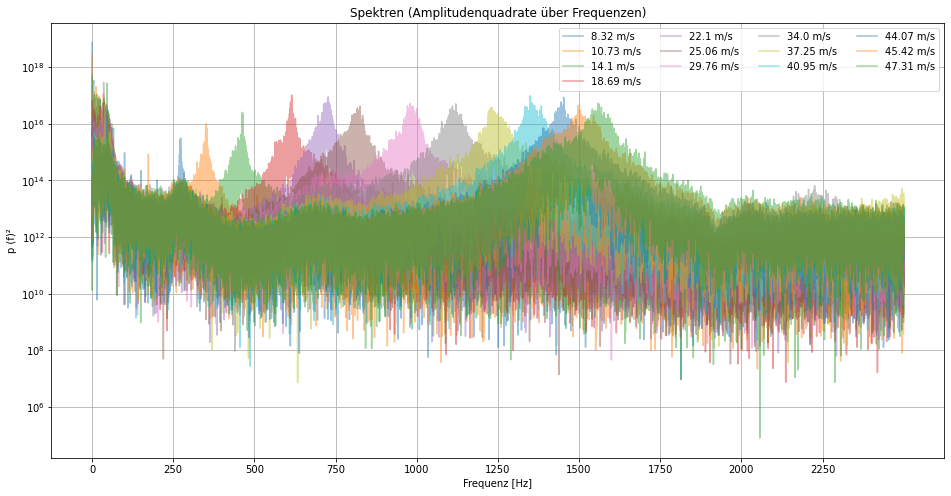

In [4]:
# Hier eigenen Code schreiben ...
plt.figure(figsize=(16,8)) 

import numpy as np


for i in range(13):
    plt.xlabel("Frequenz [Hz]") 
    plt.ylabel("p (f)²") 
    plt.title("Spektren (Amplitudenquadrate über Frequenzen)") 
    rd, rs = read(wavlist[i])
    yax = abs(np.fft.rfft(rs, n = None, axis = -1 , norm = None)**2)
    xax = np.fft.rfftfreq(rs.size, d = 1/rd)
    limit = np.searchsorted(xax,2500)
    #plt.plot(xax[:25000], yax[:25000] , alpha = 0.45)
    plt.plot(xax[:limit], yax[:limit] , alpha = 0.45)
    plt.xticks(np.arange(0, 2500, 250))
    
plt.axis('auto')
plt.grid('on')
plt.yscale('log')
plt.legend([f'{i} m/s' for i in vlist],loc="upper right", ncol=4);

**2.2) Finden Sie für jede Strömungsgeschwindigkeit den jeweils markanten Ton (d.h. den Maximalwert im Spektrum).**
  * Vernachlässigen Sie in Ihrer Betrachtung Frequenzen unter 100 Hz.
  * Geben Sie die charakteristische Frequenz $f$ für jede Geschwindigkeit $v$ in übersichtlicher Form aus, z.B.: `v:  0.00 m/s,    f:    0.0 Hz`

In [5]:



flist = []
for i in range(13): 
    rd, rs = read(wavlist[i])
    yax = abs(np.fft.rfft(rs, n = None, axis = -1 , norm = None)**2)
    xax = np.fft.rfftfreq(rs.size, d = 1/rd)
    
    xup = np.searchsorted(xax,2500)
    xdown = np.searchsorted(xax,100)
    
    maximaltonindex = np.argmax(yax[xdown:xup])+xdown
    
    maxifreq= xax[maximaltonindex]
    flist.append(maxifreq)
    
    print(f"v:  {vlist[i]} m/s,\tf:  {maxifreq:.1f} Hz")
fl = np.array(flist)


v:  8.32 m/s,	f:  272.8 Hz
v:  10.73 m/s,	f:  351.7 Hz
v:  14.1 m/s,	f:  463.0 Hz
v:  18.69 m/s,	f:  614.7 Hz
v:  22.1 m/s,	f:  727.2 Hz
v:  25.06 m/s,	f:  825.0 Hz
v:  29.76 m/s,	f:  980.2 Hz
v:  34.0 m/s,	f:  1120.1 Hz
v:  37.25 m/s,	f:  1227.6 Hz
v:  40.95 m/s,	f:  1349.7 Hz
v:  44.07 m/s,	f:  1452.6 Hz
v:  45.42 m/s,	f:  1497.1 Hz
v:  47.31 m/s,	f:  1559.2 Hz


### 3) Modellbildung

Es soll angenommmen werden, dass ein annähernd linearer Zusammenhang der beiden Größen $v$ und $f$ besteht. 
Um diesen zu ermitteln, soll daher eine [Regressionsgerade](https://de.wikipedia.org/wiki/Lineare_Einfachregression) berechnet werden.
Eine Gerade im zweidimensionalen Raum ist definiert durch 2 Parameter $a, b$:
$$
f = a\,v + b
$$

Die Koeffizienten $a$ und $b$ der Regressionsgerade berechnen sich über:

$$
a=\frac{\sum_{i=1}^{N} (v_i - \overline v)(f_i - \overline f)}{\sum_{i=1}^{N}(v_i - \overline v)^2}\\
b=\overline f - a\,\overline v
$$

**3.1) Schreiben Sie eine Funktion _ab()_, die für beliebige, gleich lange Arrays _v_ und _f_ die Geraden-Parameter _a_ und _b_ berechnet und zurückgibt.**

In [6]:
def ab(v,f):
    # Hier eigenen Code schreiben ...
    vmean = np.mean(v)
    fmean = np.mean(f)
    azähler = 0
    anenner = 0
    for i in range(len(v)):
        zähler = (v[i]-vmean)*(f[i]-fmean)
        azähler += zähler
        zähler2 = (v[i]-vmean)**2
        anenner += zähler2
    a = azähler/anenner
    b = fmean-a*vmean
    return a,b


    
    

In [7]:
# Hier ist ein Plausibilitätstest:
import numpy as np
assert ab(np.array([1,2]),np.array([0,1])) == (1.,-1.), 'ab-Funktion'

**3.2) Wenden Sie die Funktion auf die Wertepaare aus Aufgabenteil 2.2 an und zeichnen Sie die Regressionsgerade (als Linie) zusammen mit den Ausgangswerten (als Punkte) in ein Diagramm.**

  * Achten Sie auf korrekte Achsenbeschriftungen.
  * Geben Sie außerdem an, welche charakteristischen Töne bei $v=15\,\frac{\text{m}}{\text{s}}$, $v=42\,\frac{\text{m}}{\text{s}}$ und $v=50\,\frac{\text{m}}{\text{s}}$ zu erwarten wären.
  * Zeichnen Sie die Abweichung der gemessenen Werte zur Regressionsgerade in ein separates Diagramm.
  * Wie groß sind Mittelwert und Standardabweichung dieser Abweichungen?

Für eine Geschwindigkeit von 15 m/s wäre ein Ton mit einer Frequenz von 492.92 Hz zu erwarten.
Für eine Geschwindigkeit von 42 m/s wäre ein Ton mit einer Frequenz von 1384.2 Hz zu erwarten.
Für eine Geschwindigkeit von 50 m/s wäre ein Ton mit einer Frequenz von 1648.28 Hz zu erwarten.
1.0056912567681418e-13 Hz ist der Mittelwert der Abweichungungen.
0.1818770897661293 Hz ist die Standardabweichung der Abweichungen.


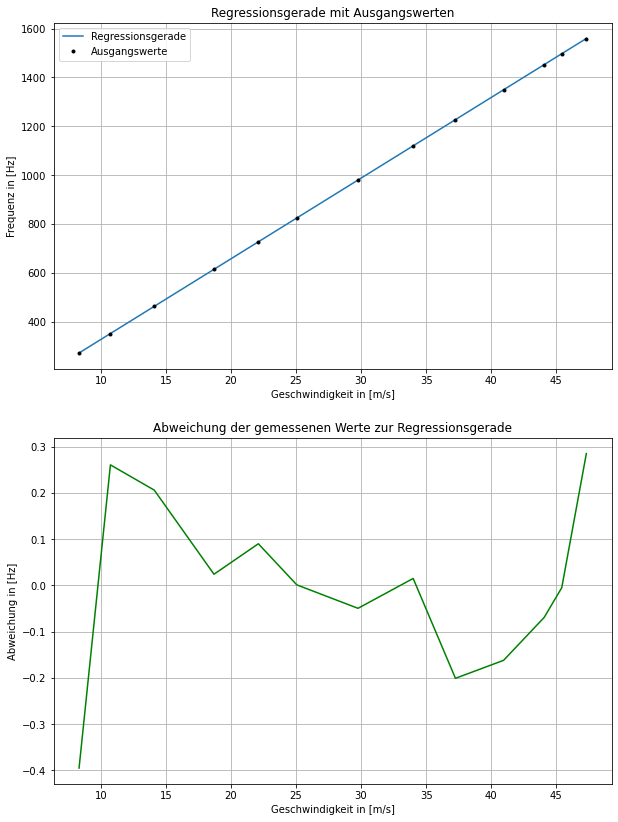

In [8]:









fl = np.array(flist)
vl = np.array(vlist)

a, b = ab(vl,fl)
fig = plt.figure(figsize=(10,14));
axis1 = fig.add_subplot(211);
y = (a*vl)+b
x = vl
axis1.plot(x,y , label = 'Regressionsgerade');
plt.xlabel("Geschwindigkeit in [m/s]");
plt.ylabel("Frequenz in [Hz]");
axis1.plot(vlist,flist, '.' , color = 'black' , label = 'Ausgangswerte');
plt.title('Regressionsgerade mit Ausgangswerten');
plt.grid('on');
axis1.legend()



# Charakteristische Töne für 15,42,50 m/s
char = [15,42,50]
Fr = []
for i in range(len(char)): 
    e = a*char[i]+b
    Fr.append(round(e,2))

for i in range(3):
    print("Für eine Geschwindigkeit von" , char[i], "m/s wäre ein Ton mit einer Frequenz von" , Fr[i], "Hz zu erwarten.")
 

#Abweichung der gemessenen Werte zur Regressionsgerade 

abw = y- flist

axis2 = fig.add_subplot(212);
axis2.plot(vlist,abw , color = 'green')
plt.grid('on');
plt.title('Abweichung der gemessenen Werte zur Regressionsgerade')
plt.ylabel("Abweichung in [Hz]")
plt.xlabel("Geschwindigkeit in [m/s]") 




#Mittelwert und Standardabweichung

print(np.mean(abw) , "Hz ist der Mittelwert der Abweichungungen.")
print(np.std(abw) ,"Hz ist die Standardabweichung der Abweichungen.")

 
